# Stochastic Differential Equations, Quantum Phase Space, and Julia

$$
\def\julia{\texttt{julia}}
\def\dashint{{\int\!\!\!\!\!\!-\,}}
\def\infdashint{\dashint_{\!\!\!-\infty}^{\,\infty}}
\def\D{\,{\rm d}}
\def\E{{\rm e}}
\def\dx{\D x}
\def\dt{\D t}
\def\dz{\D z}
\def\C{{\mathbb C}}
\def\R{{\mathbb R}}
\def\CC{{\cal C}}
\def\HH{{\cal H}}
\def\I{{\rm i}}
\def\qqqquad{\qquad\qquad}
\def\qqfor{\qquad\hbox{for}\qquad}
\def\qqwhere{\qquad\hbox{where}\qquad}
\def\Res_#1{\underset{#1}{\rm Res}}\,
\def\sech{{\rm sech}\,}
\def\vc#1{{\mathbf #1}}
$$

Dr. Ashton Bradley
<br>
ashton.bradley@otago.ac.nz
<br>
http://amoqt.otago.ac.nz

# Intro to julia

This laboratory will serve as an introduction to julia, and provide some essential background for stochastic processes.  

## Workshop 1 (1.5 hours): $\julia$ in a nutshell
Getting started in $\julia$: the basics

- Familiarity with $\julia$ computing environments: REPL, Jupyter, Juno
- Variables, functions 
- Using packages and plotting
- How does $\julia$ solve the two-language problem?

References

- [julialang.org](https://julialang.org)
- [juliaobserver](https://juliaobserver.com)
- *Julia: A Fresh Approach to Numerical Computing*, Jeff Bezanson, Alan Edelman, Stefan Karpinski and Viral B. Shah [SIAM Review, __59__, 65–98 (2017)](http://julialang.org/publications/julia-fresh-approach-BEKS.pdf)
- [Fun and sometimes useful julia packages](http://amoqt.otago.ac.nz/resources/juliajam)

# Motivation: the two-language problem
Why another language? 

- Compiled languages
    - Fast execution
    - Slow to read/write/debug
    - Tend to get isolated from latest conceptual developments 
- Interpreted languages 
    - Slow exection
    - Easy to read/write/debug
    - Not well suited for high performance computing
- This is a ___major___ issue in technical computing. 
- This conflict motivated the development of $\julia$ at MIT (1.0 released 2018). 
- [next big thing?](https://www.techrepublic.com/article/is-julia-the-next-big-programming-language-mit-thinks-so-as-version-1-0-lands/)
- [Julia joined the "petaflop club" in 2017](https://www.hpcwire.com/off-the-wire/julia-joins-petaflop-club/), the only high level scripting language ever to do so.

## Julia microbenchmarks
[https://julialang.org/benchmarks/](https://julialang.org/benchmarks/)

<img src="media/juliabench.png" width="600">

<img src="media/packages.png" width="600">

## Julia observer

An up to date package listing is provided at [juliaobserver.com](https://juliaobserver.com/packages)

## Language 
Julia is powered by several unique language innovations that developers love, and I think you will too once you get to know a bit more about them:

- Multiple dispatch: methods are not owned by classes.
- Duck typing: you can define your own data types by their properties; they translate across all of julia 
- Different julia modules can call each other without any loss of performance

Coming from a different language, you may find a list of [noteworthy differences to other languages](https://docs.julialang.org/en/v0.7.0/manual/noteworthy-differences/)  useful.

# $\julia$ environments

## Read, Evaluate, Print, Loop (REPL)

<img src="media/repl.png" width="500">

## Package manager

To access Pkg mode in the REPL, type
```julia
julia> ]
```
which will give you the prompt

```julia
(@v1.4) pkg>
```
To add a package

```julia
(@v1.4) pkg> add IJulia 
```
Then type backspace to go back to REPL mode. 

Note that REPL commands are just $\julia$ commands, so julia REPL and jupyter are identical, except that the Pkg mode can't be accessed in jupyter.

In [34]:
#how to execute Pkg commands in jupyter
using Pkg
pkg"status"

Status `~/.julia/environments/v1.4/Project.toml`
  [537997a7] AbstractPlotting v0.10.1
  [28f2ccd6] ApproxFun v0.11.11
  [c52e3926] Atom v0.12.10
  [6e4b80f9] BenchmarkTools v0.5.0
  [159f3aea] Cairo v1.0.3
  [13f3f980] CairoMakie v0.2.0
  [35d6a980] ColorSchemes v3.7.0
  [5ae59095] Colors v0.11.2
  [861a8166] Combinatorics v1.0.0
  [a81c6b42] Compose v0.8.2
  [8f4d0f93] Conda v1.4.1
  [e034abe6] Controlz v0.1.3
  [a93c6f00] DataFrames v0.20.2
  [0c46a032] DifferentialEquations v6.13.0
  [31c24e10] Distributions v0.23.2
  [e30172f5] Documenter v0.24.9
  [634d3b9d] DrWatson v1.10.2
  [7a1cc6ca] FFTW v1.2.0
  [442a2c76] FastGaussQuadrature v0.4.2
  [057dd010] FastTransforms v0.8.2
  [5789e2e9] FileIO v1.2.4
  [186bb1d3] Fontconfig v0.4.0
  [f013a474] FourierGPE v0.1.0 #master (https://github.com/AshtonSBradley/FourierGPE.jl.git)
  [92c85e6c] GSL v0.6.0
  [19dc6840] HCubature v1.4.0
  [7073ff75] IJulia v1.21.2
  [6218d12a] ImageMagick v1.1.4
  [c601a237] Interact v0.10.3
  [a98d9a8b] Inte

In [40]:
# let's add all packages for these workshops
pkgs = [:Plots,:DifferentialEquations,:GSL, :SpecialFunctions,
    :Statistics, :Plots, :LaTeXStrings, :Revise,:SymPy,:BenchmarkTools]

for pkg in pkgs
    Pkg.add(String(pkg))
end

  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.julia/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.4/Manifest.toml`


To load a package
```julia
julia> using IJulia
```

`IJulia` provides the jupyter environment for julia. 
    
To launch jupyter, enter this command in the REPL:
```julia
julia> notebook()
```

You should now have access to the lectures as jupyter notebooks.

# Jupyter
Web browser front end calls a $\julia$ kernel, evaluates, returns result; quite low overhead.

In [35]:
using Plots
gr(titlefontsize=12,grid=false,legend=false,size=(600,200)) # set defaults for GR backend

Plots.GRBackend()

In [2]:
x = LinRange(0,10,500);

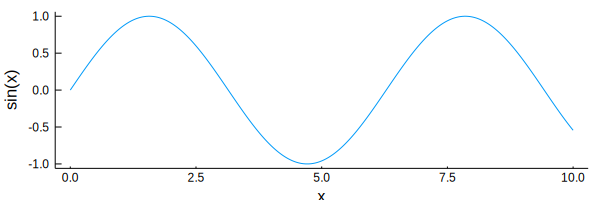

In [8]:
# first plot will take a few seconds
plot(x,sin.(x)) 
xlabel!("x");ylabel!("sin(x)")

- Dot-calls: (large) extension of Matlab's local array operation syntax.
- `xlabel!()`: `!` at the end of the function name is a julia convention that declares: "modifies the input", also referred to as a ___mutating function___; here the input is the current plot which doesn't neet to be declared. 

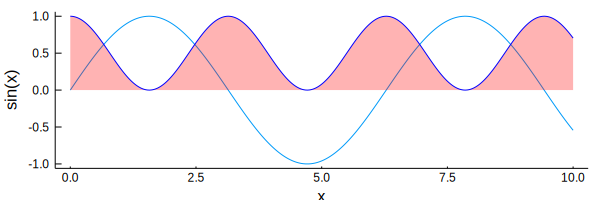

In [9]:
plot!(x,cos.(x).^2,c=:blue,fill=(0,.3,:red))

In [11]:
z=2; println(z);tan(z) #more than one command on same line

2


-2.185039863261519

In [12]:
println("hello world, this is julia. It's a bit like Matlab, Python, R, C, Fortran, Ruby, Haskell, ...
    but not really like any other language")

hello world, this is julia. It's a bit like Matlab, Python, R, C, Fortran, Ruby, Haskell, ...
    but not really like any other language


# Calling other languages

In [13]:
println("from julia you can also easily use  libraries from 
    Python, R, C/Fortran, C++, and Java. 
    Did I mention that I like ", pi ," ?")

from julia you can also easily use  libraries from 
    Python, R, C/Fortran, C++, and Java. 
    Did I mention that I like π ?


For example, a number of special functions can be called via the C library GSL ([GNU Scientific Library](https://github.com/JuliaMath/GSL.jl)):

In [14]:
#load some wrapper functions that call GSL
using GSL

In [15]:
sf_bessel_J0(0.3)

0.9776262465382961

A native $\julia$ implementation of many special functions can be found in [SpecialFunctions.jl](https://github.com/JuliaMath/SpecialFunctions.jl)

In [16]:
using SpecialFunctions

In [17]:
zeta(3) # returns a Float64

1.2020569031595951

In [18]:
zeta(2.0 + 3.0im) # returns a complex float

0.7980219851462758 - 0.11374430805293854im

In [19]:
typeof(ans)

Complex{Float64}

You can also use [PyCall.jl](https://github.com/JuliaPy/PyCall.jl) to call `python` functions with low overhead:

In [20]:
using PyCall

┌ Info: Precompiling PyCall [438e738f-606a-5dbb-bf0a-cddfbfd45ab0]
└ @ Base loading.jl:1260


In [23]:
pymath = pyimport("math")
pymath.sin(pymath.pi / 4) - sin(pi / 4)  # returns 0.0

0.0

- A nice feature of jupyter is that we can enter text, latex, and code, all in one easily shareable document. 
- Open Science! Yay! There are [many other kernels](https://github.com/jupyter/jupyter/wiki/Jupyter-kernels) available for jupyter.
- The importance of such an open science standard is highlighted by major scientific discovery of LIGO: the black hole merger data, simulations, and analysis were provided as [jupyter notebooks](https://blog.jupyter.org/congratulations-to-the-ligo-and-virgo-collaborations-from-project-jupyter-5923247be019).

- To shift from ___code mode___ to ___markdown mode___, press `ESC`, then `y`.

- You can now type text with simple [markdown](https://www.markdownguide.org/cheat-sheet/) syntax, LaTeX in-line $\langle x\rangle=\pi$, and full line equations:
$$i\hbar\frac{\partial\psi}{\partial t}=\hat{H}\psi,$$
add [links](http://www.google.com), and drag in images. Not all of latex is supported, but for example, you can

\begin{align}
\partial_t\psi&=L\psi\tag{some equation}\\
-\nabla^2\psi&=\lambda\psi\tag{some other}
\end{align}

- To go back to code mode, press `ESC`, then `m`; default is code mode. 

- A full list of keyboard shortcuts can be found under the help menu above.

## Cool things you can do in julia

In [24]:
😸=35.6 #unicode inputs are allowed varables!

35.6

In [25]:
ψ=25 #LaTeX tab completion: type \psi<tab> to get the greek letter ψ.

25

In [26]:
ħ = 1.0545718e-34 #\hbar<tab>

1.0545718e-34

In [27]:
#variable precision: set the number of bits
BigFloat(pi,2000)

3.141592653589793238462643383279502884197169399375105820974944592307816406286208998628034825342117067982148086513282306647093844609550582231725359408128481117450284102701938521105559644622948954930381964428810975665933446128475648233786783165271201909145648566923460348610454326648213393607260249141273724587006606315588174881520920962829254091715364367892590360011330530548820466521384146951941511609433057270365759591953092186117381932611793105118548074462379962749567351885752724891227938183011949129833673362440656643086021394946395224737190702179860943702770539217176293176752384674818467669405131996

In [22]:
exp(im*BigFloat(pi,2000))+1

0.0 + 4.582363384086222409168621731742190695845080541202039763581730143804801597402798e-603im

In [23]:
typeof(BigFloat(pi))

BigFloat

Here "BigFloat" is both 

- a method to perform type conversion, and 
- the name of a data type. 

These two things are defined separately.

In [24]:
mypi = BigFloat(pi,64)

3.14159265358979323851

In [25]:
typeof(mypi) <: AbstractFloat

true

There is an abstract type system that you can extend as you like.

In [26]:
?BigFloat 

search: BigFloat



```
BigFloat <: AbstractFloat
```

Arbitrary precision floating point number type.

---

```
BigFloat(x)
```

Create an arbitrary precision floating point number. `x` may be an [`Integer`](@ref), a [`Float64`](@ref) or a [`BigInt`](@ref). The usual mathematical operators are defined for this type, and results are promoted to a [`BigFloat`](@ref).

Note that because decimal literals are converted to floating point numbers when parsed, `BigFloat(2.1)` may not yield what you expect. You may instead prefer to initialize constants from strings via [`parse`](@ref), or using the `big` string literal.

```jldoctest
julia> BigFloat(2.1)
2.100000000000000088817841970012523233890533447265625

julia> big"2.1"
2.099999999999999999999999999999999999999999999999999999999999999999999999999986
```

---

```
BigFloat(x, prec::Int)
```

Create a representation of `x` as a [`BigFloat`](@ref) with precision `prec`.

---

```
BigFloat(x, prec::Int, rounding::RoundingMode)
```

Create a representation of `x` as a [`BigFloat`](@ref) with precision `prec` and [`Rounding Mode`](@ref Base.Rounding.RoundingMode) `rounding`.

---

```
BigFloat(x, rounding::RoundingMode)
```

Create a representation of `x` as a [`BigFloat`](@ref) with the current global precision and [`Rounding Mode`](@ref Base.Rounding.RoundingMode) `rounding`.

---

```
BigFloat(x::String)
```

Create a representation of the string `x` as a [`BigFloat`](@ref).


## Arrays and functions

In [27]:
x = randn(6)

6-element Array{Float64,1}:
  1.05998177182784  
  0.9163974274017533
 -1.0175765184304009
  0.1651457938104572
  0.8574853490976208
 -0.6715652549844074

In [28]:
x[2] # accessing an element of an array: [] vs ()

0.9163974274017533

In [29]:
x^2 #a typicaly method error

MethodError: MethodError: no method matching ^(::Array{Float64,1}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:795
  ^(!Matched::Missing, ::Integer) at missing.jl:120
  ^(!Matched::Missing, ::Number) at missing.jl:93
  ...

In [30]:
x.^2 # a dot-call: element-wise operations

6-element Array{Float64,1}:
 1.1235613566072868 
 0.8397842449485518 
 1.035461970860936  
 0.02727313321328604
 0.7352811239170686 
 0.45099989170227217

In [31]:
# let's define a function (this is one way)
f(x) = x^3-x+pi

f (generic function with 1 method)

In [32]:
f.(x) #dot-call

6-element Array{Float64,1}:
 3.2725654392958363
 2.9947713478314166
 3.1055073847444414
 2.9809509030135426
 2.914600095719091 
 3.510282051305224 

same result without passing to a function:

In [33]:
x.^3 .-x.+pi #manually dot all operations that will act on arrays element by element

6-element Array{Float64,1}:
 3.2725654392958363
 2.9947713478314166
 3.1055073847444414
 2.9809509030135426
 2.914600095719091 
 3.510282051305224 

In [34]:
@. x^3-x+pi # the macro @. will dot-the-lot.

6-element Array{Float64,1}:
 3.2725654392958363
 2.9947713478314166
 3.1055073847444414
 2.9809509030135426
 2.914600095719091 
 3.510282051305224 

By dotting the function call, `f.(x)`, the dot is applied to all operations.

### Two-dimensional example

In [2]:
f2(x,y) = x^3-y+pi

f2 (generic function with 1 method)

In [36]:
y = x

6-element Array{Float64,1}:
  1.05998177182784  
  0.9163974274017533
 -1.0175765184304009
  0.1651457938104572
  0.8574853490976208
 -0.6715652549844074

In [37]:
f2(x,y) #(oops!)

MethodError: MethodError: no method matching ^(::Array{Float64,1}, ::Int64)
Closest candidates are:
  ^(!Matched::Float16, ::Integer) at math.jl:795
  ^(!Matched::Missing, ::Integer) at missing.jl:120
  ^(!Matched::Missing, ::Number) at missing.jl:93
  ...

In [38]:
f2.(x,y) #acts on each element of column vectors x, y

6-element Array{Float64,1}:
 3.2725654392958363
 2.9947713478314166
 3.1055073847444414
 2.9809509030135426
 2.914600095719091 
 3.510282051305224 

In [39]:
f2.(x,y') #broadcasts each element of x along y, and of y along x

6×6 Array{Float64,2}:
 3.27257  3.41615  5.35012  4.1674   3.47506  5.00411
 2.85119  2.99477  4.92875  3.74602  3.05368  4.58273
 1.02795  1.17153  3.10551  1.92279  1.23045  2.7595 
 2.08611  2.2297   4.16367  2.98095  2.28861  3.81766
 2.7121   2.85569  4.78966  3.60694  2.9146   4.44365
 1.77874  1.92232  3.85629  2.67357  1.98123  3.51028

This is a beautiful feature of $\julia$ due in large part to Steven Johnson (MIT, of FFTW fame). It goes quite deeply into the language, allowing you to create "fused kernels", compiling many dot-calls together into a single highly efficient operation acting locally in memory. 

# Memory and function calls
It is worth emphasizing at this point that one of the great advantages of $\julia$ is that it allows low-level access to memory, giving pathways to overcome one of the main bottleknecks of interpreted languages. A major deficiency  of other high-level languages such as Matlab is that function calls are slowed down by temporary memory allocations. 

## Writing in-place
If we want to do a calculation and write the output in-place in memory

In [1]:
using BenchmarkTools 

In [3]:
x=randn(10000);

In [4]:
#let's pre-allocate somwhere to write the output
z = f2.(x,x');

In [5]:
# do many calls, and return average execution time, and memory allocations
@btime z = f2.(x,x');

  591.136 ms (5 allocations: 762.94 MiB)


So far this is an allocating call, requiring a temporary memory address for the result, before finally writing the result to `z`. 

Now let's write the result directly to memory, the $\julia$ way:

In [6]:
@btime z .= f2.(x,x');

  90.926 ms (3 allocations: 64 bytes)


The calculation is basically allocation free, with a significant speed up. In ambitious physics simulations, this can translate into much larger gains in execution speed.

This is probably a good time to point out that 

- In $\julia$ there is no speed advantage to "vectorizing" your code. 
- If you prefer to write your own loops, you will get native C speed in $\julia$.
- By using dot-calls, you will get you very close to the same speed, while maintaining the clarity of vectorized code. 

# Loops, iterators

In [45]:
for j=1:10
    println("j is $j")
end

j is 1
j is 2
j is 3
j is 4
j is 5
j is 6
j is 7
j is 8
j is 9
j is 10


In [46]:
# an interator
n = 1:30

1:30

In [47]:
typeof(n) #not an Array

UnitRange{Int64}

In [48]:
# a simple function with type conversion using redirection
sumton(n) = n*(n+1)/2 |> Int #or, better: |> typeof(n) 

sumton (generic function with 1 method)

In [49]:
sumton(3)

6

In [50]:
sumton(3.1)

InexactError: InexactError: Int64(Int64, 6.3549999999999995)

In [51]:
# a simple function with type conversion using redirection
sumton(n) = n*(n+1)/2 |> typeof(n) #or, better: |> typeof(n) 

sumton (generic function with 1 method)

In [52]:
# a for loop with string inerpolation
for j in n
    println("sum up to j: j = $j; julia gives $(sum(n[1:j])); Gauss gives $(sumton(j))")
end

sum up to j: j = 1; julia gives 1; Euler gives 1
sum up to j: j = 2; julia gives 3; Euler gives 3
sum up to j: j = 3; julia gives 6; Euler gives 6
sum up to j: j = 4; julia gives 10; Euler gives 10
sum up to j: j = 5; julia gives 15; Euler gives 15
sum up to j: j = 6; julia gives 21; Euler gives 21
sum up to j: j = 7; julia gives 28; Euler gives 28
sum up to j: j = 8; julia gives 36; Euler gives 36
sum up to j: j = 9; julia gives 45; Euler gives 45
sum up to j: j = 10; julia gives 55; Euler gives 55
sum up to j: j = 11; julia gives 66; Euler gives 66
sum up to j: j = 12; julia gives 78; Euler gives 78
sum up to j: j = 13; julia gives 91; Euler gives 91
sum up to j: j = 14; julia gives 105; Euler gives 105
sum up to j: j = 15; julia gives 120; Euler gives 120
sum up to j: j = 16; julia gives 136; Euler gives 136
sum up to j: j = 17; julia gives 153; Euler gives 153
sum up to j: j = 18; julia gives 171; Euler gives 171
sum up to j: j = 19; julia gives 190; Euler gives 190
sum up to j: j 

## Geometric series
Let's make a little function to evaluate the geometric series up to a given polynomial degree $N-1$.

__Exercise:__ Write a function to sum `N` terms in the geometric series, for input `x`.

In [28]:
# write a function to add up the terms
function geometric(x,N)
    y=zero(x)
    for j=0:N-1
        y+=x^j
    end
    return y
end

geometric (generic function with 1 method)

(note we haven't used any type annotations!)

and compare with the analytical result:
<div class="alert alert-block alert-warning"><font color=blue>
$$S_N=\sum_{k=0}^{N-1}x^k=1+x+x^2+x^3\dots+x^{N-1}=\frac{1-x^N}{1-x}$$
</font></div>

In [29]:
geomExact(x,N)=(1-x^N)/(1-x)

geomExact (generic function with 1 method)

A note on compilation and evaluation
 - first call with particular data type triggers the $\julia$ JIT to compile fast code.
 - all later calls with the same type will get fast execution

Let's time the first call:

In [30]:
@time geometric(.1,1000) #compile

  0.000017 seconds


1.1111111111111112

Now $\julia$ has compiled efficient code for the types we passed (not the values), i.e. Float64 and Int64

In [31]:
@time geometric(.1,1000) # ~C speed!

  0.000019 seconds


1.1111111111111112

In [32]:
@btime geometric(.1,1000) # a more reliable measure of timing

LoadError: UndefVarError: @btime not defined

Our two functions should achieve the same result to numerical precision

In [58]:
x = 0.97
N = 100
geometric(x,N),geomExact(x,N)

(31.74824973581979, 31.748249735819783)

In this example, "numerical precision" means about 1e-14 due to accumulated floating point error:

In [59]:
isapprox(geometric(x,N),geomExact(x,N),atol=1e-14)

true

Notice we can dot some or all of the arguments:

In [60]:
geometric.([0.1; 0.2; 0.3],100) 

3-element Array{Float64,1}:
 1.1111111111111112
 1.25              
 1.4285714285714288

In [61]:
geometric.(0.7,[10 20 30 100]) 

1×4 Array{Float64,2}:
 3.23917  3.33067  3.33326  3.33333

In [64]:
geometric.([0.1; 0.2; 0.7],[2 5 10 30]) 

3×4 Array{Float64,2}:
 1.1  1.1111  1.11111  1.11111
 1.2  1.2496  1.25     1.25   
 1.7  2.7731  3.23917  3.33326

# Miltiple dispatch
This is really the key language feature the sets $\julia$ apart from other technical computing languages. 
- Methods are not owned by classes
- Operator overloading is ubiquitous and tied to data type
- Types can be extended at will

In [38]:
methods(*);

In [8]:
@code_lowered 5*5 #what is high-level julia translated into?

CodeInfo(
│54 1 ─ %1 = (Base.mul_int)(x, y)
│   └──      return %1
)

In [9]:
@code_llvm 5*5 #what does the compiler produce?


; Function *
; Location: int.jl:54
define i64 @"julia_*_24657"(i64, i64) {
top:
  %2 = mul i64 %1, %0
  ret i64 %2
}


In [10]:
@code_lowered 5*2.1

CodeInfo(
│314 1 ─ %1 = (Base.promote)(x, y)
│    │   %2 = (Core._apply)(Base.:*, %1)
│    └──      return %2
)

In [11]:
@code_llvm 5*2.1


; Function *
; Location: promotion.jl:314
define double @"julia_*_27876"(i64, double) {
top:
; Function promote; {
; Location: promotion.jl:284
; Function _promote; {
; Location: promotion.jl:261
; Function convert; {
; Location: number.jl:7
; Function Type; {
; Location: float.jl:60
  %2 = sitofp i64 %0 to double
;}}}}
; Function *; {
; Location: float.jl:399
  %3 = fmul double %2, %1
;}
  ret double %3
}


In [12]:
#multiply two integers
@btime 5*5

  0.040 ns (0 allocations: 0 bytes)


25

In [13]:
#multiply a float and an integer
@btime 5*2.1

  1.886 ns (0 allocations: 0 bytes)


10.5

Is float multiplication really that much slower?

In [14]:
#multiply two floats
@btime 5.0*2.1

  0.031 ns (0 allocations: 0 bytes)


10.5

No, we took a hit from promotion. These timing comparisons and code principles apply across the enirety of $\julia$: 

<div class="alert alert-block alert-warning"><font color=blue>
You are both free to create without concern for data types, and free to optimize so that efficient code is written for you by the compiler once your code is type stable.
    </font></div>    
    
- Note 90\% of $\julia$ is written in $\julia$: the core of julia is setting up a composable type system and multiple dispatch structure for methods. All data types and methods that act on therm are build with the same core language that you are free to extend as you wish!

- This is one of the main reasons developers enjoy $\julia$. 

- For users: come for the speed, stay for the productivity!

## Avoid global scope: functions are key
There is one final "gotcha" that I need to emphasize: running any sequence of commands straight in the REPL or in a Jupyter cell _can_ lead to a speed penalty that will be immediately fixed by wrapping your code inside a function. This is because for $\julia$, the command line is at global scope, and the compiler has trouble inferring type information for global variables (unless you declare types for each variable explicitly). The function barrier makes the compiler's job much easier, and should make your code much more usable. 

In $\julia$, your writing should always proceed towards wrapping hard-working commands inside functions to get the job done in a fast and modular way that avoids this issue. 

Happily, creating and modifying functions in $\julia$ is super-easy!

# Array comprehension
Julia has absorbed many nice language features that have emerged in different contexts. For example the array comprehension, a nice natural language syntax for building complex arrays of arbitrary size, element by element. (a little slow to evaluate, but clear and easy to write!)

In [73]:
B = [i*j^2 for i in 1:5, j in 1:4, k in 1:3]

5×4×3 Array{Int64,3}:
[:, :, 1] =
 1   4   9  16
 2   8  18  32
 3  12  27  48
 4  16  36  64
 5  20  45  80

[:, :, 2] =
 1   4   9  16
 2   8  18  32
 3  12  27  48
 4  16  36  64
 5  20  45  80

[:, :, 3] =
 1   4   9  16
 2   8  18  32
 3  12  27  48
 4  16  36  64
 5  20  45  80

In [15]:
truthTable = [i*j for i in [true; false], j in [true; false]]

2×2 Array{Bool,2}:
  true  false
 false  false

In [75]:
⊗=kron

kron (generic function with 25 methods)

In [76]:
using LinearAlgebra

In [77]:
a = randn(3,3)
b = one(randn(2,2))

2×2 Array{Float64,2}:
 1.0  0.0
 0.0  1.0

In [78]:
a⊗b

6×6 Array{Float64,2}:
  2.04888    0.0       1.07188   0.0       -0.181842   -0.0      
  0.0        2.04888   0.0       1.07188   -0.0        -0.181842 
 -0.149097  -0.0       0.855614  0.0       -0.629326   -0.0      
 -0.0       -0.149097  0.0       0.855614  -0.0        -0.629326 
  0.520474   0.0       0.198172  0.0       -0.0354704  -0.0      
  0.0        0.520474  0.0       0.198172  -0.0        -0.0354704

In [79]:
b⊗a

6×6 Array{Float64,2}:
  2.04888   1.07188   -0.181842    0.0       0.0       -0.0      
 -0.149097  0.855614  -0.629326   -0.0       0.0       -0.0      
  0.520474  0.198172  -0.0354704   0.0       0.0       -0.0      
  0.0       0.0       -0.0         2.04888   1.07188   -0.181842 
 -0.0       0.0       -0.0        -0.149097  0.855614  -0.629326 
  0.0       0.0       -0.0         0.520474  0.198172  -0.0354704

More introductory topics to explore:
- [Conditional evaluation; ternary operator](https://docs.julialang.org/en/v1/manual/control-flow/#man-conditional-evaluation-1)
- [Mathematical operators](https://docs.julialang.org/en/v1/base/math/#math-ops-1)

More packages to explore:
 - [DynamicalSystems](https://github.com/JuliaDynamics/DynamicalSystems.jl)
 - [QuantumOptics](https://github.com/qojulia/QuantumOptics.jl)
 - [SymPy](https://github.com/JuliaPy/SymPy.jl)
 - [PGFPlots](https://github.com/JuliaTeX/PGFPlots.jl)

 ## Juno
 - Integrated Development Environment based on the wonderful open-source editor [Atom](https://atom.io/).
 - Great once you get into writing a sizeable amount of code.
 - Line by line evaluation, plotting, workspace, documentation browser, GitHub integration, etc. 

<img src="media/juno.png" width="600">